## Color segmentation

Color segmentation refers to the technique of dividing an image into distinct regions based on their color properties. This teachnique helps in identifying and separating different objects in an image based on their color values.
 
The most widely used color space is RGB color space. To identify a region of a specific color, put the threshold and create a mask to separate the different colors.  
To effectively segment objects based on their color, images are often converted from the standard RGB color space to other color spaces such as HSV (Hue, Saturation, Value) or Lab color space, which better represent color characteristics for segmentation tasks. 

Techniques like K-means clustering are often used to group pixels with similar color values into separate clusters as well. This appraoch automatically identifies color regions within an image.

This lab covers following topics:
   - Basic color segmentation using thresholding 
   - K-mean clustering

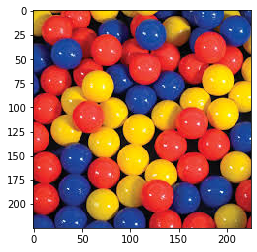

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load our image as greyscale 
#img = cv2.imread('images/download.jpg')
img = cv2.imread('../images/p05/3colorballs.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
hsv_nemo = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

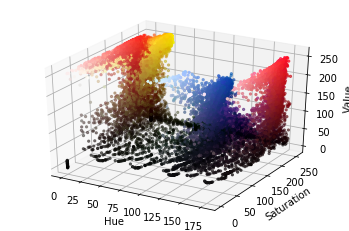

In [4]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
from matplotlib import colors


h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')

pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [5]:
lower_red = (0, 120, 100)   # HSV VALUES
upper_red = (10, 255, 255)

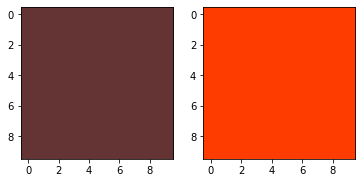

In [6]:
from matplotlib.colors import hsv_to_rgb

#lower_red = np.array([0,120,70])
#upper_red = np.array([10,255,255])

lo_square = np.full((10, 10, 3), lower_red, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_red, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

In [7]:
mask = cv2.inRange(hsv_nemo, lower_red, upper_red)

In [8]:
result = cv2.bitwise_and(img, img, mask=mask)

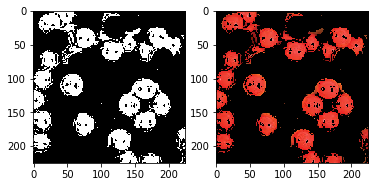

In [9]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

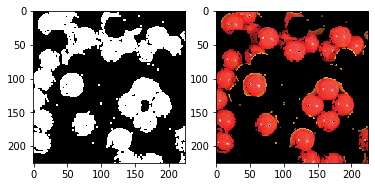

In [10]:
# Morphology 
# MORPH_OPEN is for removing in an image
# MORPH_DILATE is an operation for enlarging segmented regions. 

mask1 = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
mask1 = cv2.morphologyEx(mask, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))


#Segmenting the object out of the frame 
res1 = cv2.bitwise_and(img,img,mask=mask1)

plt.subplot(1, 2, 1)
plt.imshow(mask1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res1)
plt.show()

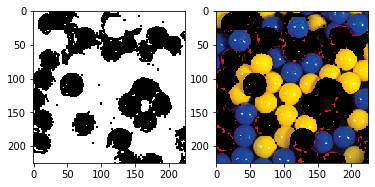

In [11]:
# creating image showing static background frame pixels only for the masked region
mask2 = cv2.bitwise_not(mask1)
res2 = cv2.bitwise_and(img, img, mask = mask2)

#Generating the final output
plt.subplot(1, 2, 1)
plt.imshow(mask2, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res2)
plt.show()

In [12]:
# K-mean Cluster to see the dominace colors

import cv2
import numpy as np
from sklearn.cluster import KMeans

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

[177.58255384 208.3632804  210.18207527] 9.07%
[ 95.19107981 171.0541471   42.05179969] 12.64%
[112.16074038 187.76952427 141.17965579] 24.31%
[ 12.29919473 212.70307467 229.702306  ] 53.97%


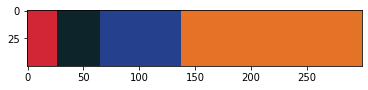

In [13]:
# Load image and convert to a list of pixels
image = cv2.imread('../images/p05/3colorballs.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find and display most dominant colors
#cluster = KMeans(n_clusters=5).fit(reshape)
kmeans_cluster = KMeans(n_clusters=4, init="k-means++").fit(reshape)
#kmeans_cluster = KMeans(n_clusters=4, init="random").fit(reshape)
visualize = visualize_colors(kmeans_cluster, kmeans_cluster.cluster_centers_)
visualize = cv2.cvtColor(visualize, cv2.COLOR_HSV2RGB)
plt.imshow(visualize)

In [14]:
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

cluster_centers

array([[112.16074038, 187.76952427, 141.17965579],
       [ 12.29919473, 212.70307467, 229.702306  ],
       [177.58255384, 208.3632804 , 210.18207527],
       [ 95.19107981, 171.0541471 ,  42.05179969]])

In [15]:
cluster_labels

array([1, 1, 1, ..., 1, 2, 2])

In [34]:
labeled_im =cluster_centers[cluster_labels].reshape(image.shape)*5
labeled_im.dtype

dtype('float64')

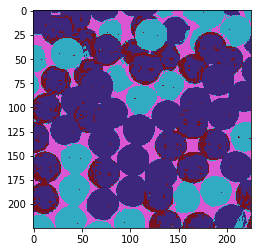

In [35]:
plt.figure(figsize = (4,4))
plt.imshow(labeled_im.astype(np.uint8))

In [ ]:
# K-mean using OpenCV

Image size is  (981, 736, 3)
After resizing :  (722016, 3)


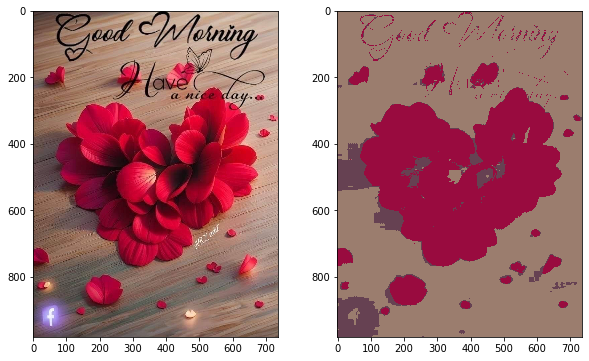

In [22]:
# K-mean Cluster to see the dominace colors

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read in the image
image = cv2.imread('lab6/redLoves.jpg')

# Change color to RGB (from BGR)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)
print('Image size is ', image.shape)
print('After resizing : ', pixel_vals.shape)

#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

im1 = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
im2 = cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB)

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.imshow(im1)
plt.subplot(1,2,2)
plt.imshow(im2)